# AirBNB Berlin

## Background Information 

Berlin is one of the most favourable city to visit in Europe. There are lot of tourist attractions , not only for adults, but also for children. AirBNB want therefore expanding business by targeting not only family segment, but also groups (each includes 3 people or more). Assuming that, family/group spend more than solo traveler, it is possibly good chance to bring company more capital. it is an excitement and real good opportunity as well to figure out more about it.

## Problem Statement

In order to optimizing business expansion process, it is bigger size of accommodation needed to fulfil long holiday school. At least entire room of apartment are demanded to fulfil this criteria. Entire House for Holiday Staycation are better and more suitable for modern family.

## Business Question

- In which areas are the most potential to be grown this business?
- Are these selected features affecting the accommodation price?
- Which type of room are most to be found in each neighbourhood group?
- Is the neighbourhood of the most expensive accommodation located in the same as its neighbourhood group (district) ?
- Does the sightseeing area have impact on the price?


## Business Goals

- Giving advices to our business development team to grow our business in favorable area hence with good price.
- Building a model to suggest new accommodation price in best suitable district (neighbourhood group) for upcoming accommodation.

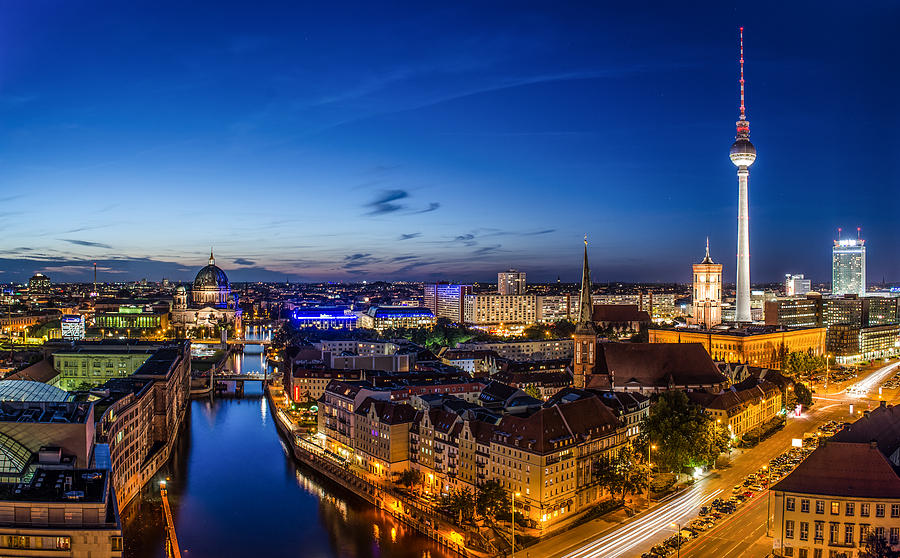

In [1]:
from IPython.display import Image

Image("M:/Purwadhika/Notizen Modul 3/Untitled Folder/Final Project/airBNB Berlin/Pict/berlin_pano.jpg")

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
df =pd.read_csv('listings2.csv')
pd.set_option('display.max_columns', None)
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20201013162227,2020-10-21,Berlin-Mitte Value! Quiet courtyard/very central,Great location! <br />30 of 75 sq meters. Thi...,It is located in the former East Berlin area o...,https://a0.muscache.com/pictures/260fd609-710a...,2217,https://www.airbnb.com/users/show/2217,Ion,2008-08-18,"Key Biscayne, Florida, United States",Isn’t sharing economy great?,within an hour,100%,97%,f,https://a0.muscache.com/im/pictures/user/21428...,https://a0.muscache.com/im/pictures/user/21428...,Mitte,7.0,7.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Germany",Brunnenstr. Süd,Mitte,52.53454,13.40256,Entire guesthouse,Entire home/apt,3,NaN,1 bath,1.0,0.0,"[""Long term stays allowed"", ""Essentials"", ""Gar...",$61.14,5,1125,5.0,29.0,1125.0,1125.0,8.5,1125.0,NaN,t,30,60,90,180,2020-10-21,134,4,1,2016-04-11,2020-09-26,93.0,10.0,9.0,10.0,10.0,10.0,9.0,NaN,f,6,6,0,0,2.43
1,3176,https://www.airbnb.com/rooms/3176,20201013162227,2020-10-20,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,The neighbourhood is famous for its variety of...,https://a0.muscache.com/pictures/243355/84afcf...,3718,https://www.airbnb.com/users/show/3718,Britta,2008-10-19,"Coledale, New South Wales, Australia",We love to travel ourselves a lot and prefer t...,NaN,NaN,67%,f,https://a0.muscache.com/im/users/3718/profile_...,https://a0.muscache.com/im/users/3718/profile_...,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,t,"Berlin, Germany",Prenzlauer Berg Südwest,Pankow,52.53500,13.41758,Entire apartment,Entire home/apt,4,NaN,1 bath,1.0,2.0,"[""Wifi"", ""Iron"", ""Smoke alarm"", ""Hangers"", ""Ki...",$90.00,62,1125,62.0,62.0,1125.0,1125.0,62.0,1125.0,NaN,t,18,48,78,353,2020-10-20,146,1,0,2009-06-20,2020-05-27,93.0,9.0,9.0,9.0,9.0,10.0,9.0,NaN,f,1,1,0,0,1.06
2,3309,https://www.airbnb.com/rooms/3309,20201013162227,2020-10-21,BerlinSpot Schöneberg near KaDeWe,First of all:<br />I prefer short-notice booki...,"My flat is in the middle of West-Berlin, direc...",https://a0.muscache.com/pictures/29054294/b1fa...,4108,https://www.airbnb.com/users/show/4108,Jana,2008-11-07,"Berlin, Berlin, Germany",ENJOY EVERY DAY AS IF IT'S YOUR LAST!!! \r\n\r...,within a day,100%,NaN,f,https://a0.muscache.com/im/pictures/user/d8049...,https://a0.muscache.com/im/pictures/user/d8049...,Schöneberg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,"Berlin, Germany",Schöneberg-Nord,Tempelhof - Schöneberg,52.49885,13.34906,Private room in apartment,Private room,1,NaN,1 shared bath,1.0,1.0,"[""Wifi"", ""Iron"", ""Smoke alarm"", ""Hangers"", ""Ca...",$28.57,7,35,7.0,7.0,35.0,35.0,7.0,35.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20227 entries, 0 to 20226
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            20227 non-null  int64  
 1   listing_url                                   20227 non-null  object 
 2   scrape_id                                     20227 non-null  int64  
 3   last_scraped                                  20227 non-null  object 
 4   name                                          20195 non-null  object 
 5   description                                   19709 non-null  object 
 6   neighborhood_overview                         11054 non-null  object 
 7   picture_url                                   20227 non-null  object 
 8   host_id                                       20227 non-null  int64  
 9   host_url                                      20227 non-null 

In [5]:
df['property_type'].unique()

array(['Entire guesthouse', 'Entire apartment',
       'Private room in apartment', 'Entire loft', 'Entire condominium',
       'Private room in loft', 'Entire guest suite', 'Entire house',
       'Private room in lighthouse', 'Boat', 'Entire townhouse',
       'Private room in guest suite', 'Private room in house',
       'Entire serviced apartment', 'Private room in hostel',
       'Shared room in hostel', 'Private room in townhouse',
       'Private room', 'Camper/RV', 'Private room in condominium',
       'Houseboat', 'Entire home/apt', 'Shared room in apartment',
       'Private room in tiny house', 'Shared room in condominium',
       'Entire place', 'Entire bungalow', 'Entire cottage',
       'Private room in bed and breakfast', 'Entire chalet',
       'Entire cabin', 'Castle', 'Room in boutique hotel',
       'Shared room in cabin', 'Entire floor', 'Entire villa',
       'Room in hostel', 'Shared room in boat', 'Shared room in house',
       'Private room in houseboat', 'Room i

# Column Selection 

In [6]:
df = df[['id', 'listing_url', 'name','description','picture_url','host_id','host_url','host_name','host_response_rate','neighbourhood_cleansed',
         'neighbourhood_group_cleansed','latitude','longitude','accommodates','room_type','bathrooms_text','bedrooms',
         'beds','price','minimum_nights','review_scores_rating','availability_365','instant_bookable']]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20227 entries, 0 to 20226
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            20227 non-null  int64  
 1   listing_url                   20227 non-null  object 
 2   name                          20195 non-null  object 
 3   description                   19709 non-null  object 
 4   picture_url                   20227 non-null  object 
 5   host_id                       20227 non-null  int64  
 6   host_url                      20227 non-null  object 
 7   host_name                     20215 non-null  object 
 8   host_response_rate            10054 non-null  object 
 9   neighbourhood_cleansed        20227 non-null  object 
 10  neighbourhood_group_cleansed  20227 non-null  object 
 11  latitude                      20227 non-null  float64
 12  longitude                     20227 non-null  float64
 13  a

# Subseting and Limiting features to support our needs

In [8]:
df1=df.loc[(df['accommodates']>=3)&(df['availability_365']>=30)]
df1

,id,listing_url,name,description,picture_url,host_id,host_url,host_name,host_response_rate,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,accommodates,room_type,bathrooms_text,bedrooms,beds,price,minimum_nights,review_scores_rating,availability_365,instant_bookable
0,2015,https://www.airbnb.com/rooms/2015,Berlin-Mitte Value! Quiet courtyard/very central,Great location! <br />30 of 75 sq meters. Thi...,https://a0.muscache.com/pictures/260fd609-710a...,2217,https://www.airbnb.com/users/show/2217,Ion,100%,Brunnenstr. Süd,Mitte,52.53454,13.40256,3,Entire home/apt,1 bath,1.0,0.0,$61.14,5,93.0,180,f
1,3176,https://www.airbnb.com/rooms/3176,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,https://a0.muscache.com/pictures/243355/84afcf...,3718,https://www.airbnb.com/users/show/3718,Britta,NaN,Prenzlauer Berg Südwest,Pankow,52.53500,13.41758,4,Entire home/apt,1 bath,1.0,2.0,$90.00,62,93.0,353,f
6,16644,https://www.airbnb.com/rooms/16644,In the Heart of Berlin - Kreuzberg,Light and sunny 2-Room-turn of the century-fla...,https://a0.muscache.com/pictures/73759174/e2ef...,64696,https://www.airbnb.com/users/show/64696,Rene,NaN,nördliche Luisenstadt,Friedrichshain-Kreuzberg,52.50479,13.43510,5,Entire home/apt,1 bath,1.0,3.0,$90.00,60,94.0,289,f
8,20858,https://www.airbnb.com/rooms/20858,Designer Loft in Berlin Mitte,Bright and sunny condo with two balconies in a...,https://a0.muscache.com/pictures/108232/205b19...,71331,https://www.airbnb.com/users/show/71331,Marc,100%,Prenzlauer Berg Südwest,Pankow,52.53695,13.40762,4,Entire home/apt,1 bath,2.0,2.0,$159.00,3,89.0,175,f
9,21869,https://www.airbnb.com/rooms/21869,Studio in the Heart of Kreuzberg,Light and sunny 1-Room-turn of the century-fla...,https://a0.muscache.com/pictures/435605/4e86bb...,64696,https://www.airbnb.com/users/show/64696,Rene,NaN,nördliche Luisenstadt,Friedrichshain-Kreuzberg,52.50273,13.43462,4,Entire home/apt,1 bath,1.0,2.0,$70.00,60,95.0,291,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20212,45822659,https://www.airbnb.com/rooms/45822659,Zimmer in Berlin,Ich vermiete insgesamt drei Schlafzimmer. Dies...,https://a0.muscache.com/pictures/12dd2c16-590a...,369199913,https://www.airbnb.com/users/show/369199913,Kwang Ja,NaN,Volkspark Wilmersdorf,Charlottenburg-Wilm.,52.48660,13.32982,5,Private room,2 shared baths,1.0,6.0,$150.00,1,NaN,90,t
20214,45824196,https://www.airbnb.com/rooms/45824196,Behindertenfreundliche Wohnung in der Nähe des...,Diese moderne behindertenfreundliche Wohnung v...,https://a0.muscache.com/pictures/1cfa86db-676a...,371496099,https://www.airbnb.com/users/show/371496099,Elisabeth,NaN,Adlershof,Treptow - Köpenick,52.43556,13.52973,6,Entire home/apt,1.5 baths,3.0,5.0,$90.00,1,100.0,157,t
20215,45826254,https://www.airbnb.com/rooms/45826254,New BIG CITY Central 5Rms Apt. With 2 Bathrooms,Neu eingerichtete grosse 5 Zimmer Wohnung ist ...,https://a0.muscache.com/pictures/944c2e1e-754a...,109353960,https://www.airbnb.com/users/show/109353960,Angelina,100%,Schöneberg-Süd,Tempelhof - Schöneberg,52.48280,13.35025,8,Entire home/apt,2 baths,4.0,7.0,$158.00,1,NaN,190,f
20225,45854853,https://www.airbnb.com/rooms/45854853,*LUXUS Wohnung Direkt Am KaDeWe Am Kurfüstendamm*,Ein luxuriöses Wohnzimmer mit Schlafbereich in...,https://a0.muscache.com/pictures/ab57cbc4-169b...,233272949,https://www.airbnb.com/users/show/233272949,Samy,100%,Schöneberg-Nord,Tempelhof - Schöneberg,52.50071,13.34630,8,Entire home/apt,1 bath,2.0,4.0,$89.86,1,NaN,352,t


## Renaming Columns

- To visualize it better

In [9]:
df1.rename(columns = {"neighbourhood_group_cleansed": "neighbourhood_group","neighbourhood_cleansed": "neighbourhood"},  
          inplace = True) 

In [10]:
df1.isna().sum()

id                        0
listing_url               0
name                      0
description              68
picture_url               0
host_id                   0
host_url                  0
host_name                 0
host_response_rate      542
neighbourhood             0
neighbourhood_group       0
latitude                  0
longitude                 0
accommodates              0
room_type                 0
bathrooms_text            6
bedrooms                230
beds                     28
price                     0
minimum_nights            0
review_scores_rating    574
availability_365          0
instant_bookable          0
dtype: int64

# Investigating each columns with NaN, checking missing values and Handling missing Values 

### Fulfilling NaN in description column with '-'

In [11]:
df1['description'] = df1['description'].fillna(value='-')

### Checking, handling NaN & Understanding Bathrooms description

1. Half Bathroom (1/2 Bath) is a bathroom without the shower and the tub. This means in the case of the half bath there should be a room with a toilet and a sink (washing hands). Typically, half bathrooms are found on the ground floor of a house where there aren’t any bedrooms nearby. And the typical meaning of a half bath is one containing a toilet but no bathing facility.

2. A full bath is a room that contain both a toilet and bathing facilities (a tub, shower, or both). And the typical meaning of a half bath is one containing a toilet but no bathing facility.

In [12]:
df1['bathrooms_text'].unique()

array(['1 bath', '2.5 baths', '1.5 shared baths', '1.5 baths', '2 baths',
       '1 shared bath', nan, '2 shared baths', '0 baths',
       '0 shared baths', '1 private bath', '4.5 baths', '3 baths',
       '4 baths', '4 shared baths', '3 shared baths', 'Half-bath',
       '3.5 baths', '7 baths', '2.5 shared baths', 'Shared half-bath',
       '5 shared baths', '8.5 shared baths', '32 baths', '18 baths'],
      dtype=object)

In [13]:
df1['bathrooms']=df1['bathrooms_text'].map({'1 bath':1,"2.5 baths":2.5,"0 baths":0,'1.5 baths': 1.5,'2 baths':2,
                                          'Half-bath':0.5,'4 baths':4 ,'nan':0})
df1.drop(columns=['bathrooms_text'],inplace=True)
df1.head(2)

,id,listing_url,name,description,picture_url,host_id,host_url,host_name,host_response_rate,neighbourhood,neighbourhood_group,latitude,longitude,accommodates,room_type,bedrooms,beds,price,minimum_nights,review_scores_rating,availability_365,instant_bookable,bathrooms
0,2015,https://www.airbnb.com/rooms/2015,Berlin-Mitte Value! Quiet courtyard/very central,Great location! <br />30 of 75 sq meters. Thi...,https://a0.muscache.com/pictures/260fd609-710a...,2217,https://www.airbnb.com/users/show/2217,Ion,100%,Brunnenstr. Süd,Mitte,52.53454,13.40256,3,Entire home/apt,1.0,0.0,$61.14,5,93.0,180,f,1.0
1,3176,https://www.airbnb.com/rooms/3176,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,https://a0.muscache.com/pictures/243355/84afcf...,3718,https://www.airbnb.com/users/show/3718,Britta,NaN,Prenzlauer Berg Südwest,Pankow,52.53500,13.41758,4,Entire home/apt,1.0,2.0,$90.00,62,93.0,353,f,1.0


In [14]:
df1.isnull().sum()

id                        0
listing_url               0
name                      0
description               0
picture_url               0
host_id                   0
host_url                  0
host_name                 0
host_response_rate      542
neighbourhood             0
neighbourhood_group       0
latitude                  0
longitude                 0
accommodates              0
room_type                 0
bedrooms                230
beds                     28
price                     0
minimum_nights            0
review_scores_rating    574
availability_365          0
instant_bookable          0
bathrooms               576
dtype: int64

In [15]:
df1['bathrooms'] = df1['bathrooms'].fillna(value=0)

### Removing the '$' sign in price column

In [16]:
df1['price'] = df1['price'].str.replace('$', '')
df1['price'] = df1['price'].str.replace(',', '')
df1['price'].unique()

array(['61.14', '90.00', '159.00', '70.00', '160.00', '135.00', '65.00',
       '113.00', '74.00', '35.00', '37.00', '105.00', '81.00', '136.00',
       '154.00', '51.00', '120.00', '79.00', '60.00', '521.00', '75.00',
       '119.00', '68.00', '59.00', '55.00', '80.00', '25.00', '161.00',
       '110.00', '49.00', '78.00', '103.00', '157.00', '170.00', '85.00',
       '52.00', '89.00', '100.00', '82.00', '84.00', '45.00', '42.00',
       '190.00', '63.86', '150.00', '93.00', '69.00', '50.00', '98.43',
       '61.00', '56.00', '30.00', '95.00', '58.00', '17.00', '16.00',
       '125.00', '240.00', '44.00', '53.00', '47.00', '72.00', '64.00',
       '32.00', '109.00', '23.00', '130.00', '180.00', '139.00', '140.00',
       '101.00', '179.00', '245.00', '76.00', '77.00', '40.00', '46.00',
       '98.00', '106.00', '43.00', '107.00', '63.00', '199.00', '455.00',
       '42.71', '500.00', '31.00', '141.00', '86.00', '27.00', '57.00',
       '280.00', '149.00', '83.00', '118.00', '200.00', 

#### Converting Price Column to numeric datatype

In [17]:
df1['price'] = pd.to_numeric(df1['price'])

In [18]:
df1.info()
df1.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3592 entries, 0 to 20226
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3592 non-null   int64  
 1   listing_url           3592 non-null   object 
 2   name                  3592 non-null   object 
 3   description           3592 non-null   object 
 4   picture_url           3592 non-null   object 
 5   host_id               3592 non-null   int64  
 6   host_url              3592 non-null   object 
 7   host_name             3592 non-null   object 
 8   host_response_rate    3050 non-null   object 
 9   neighbourhood         3592 non-null   object 
 10  neighbourhood_group   3592 non-null   object 
 11  latitude              3592 non-null   float64
 12  longitude             3592 non-null   float64
 13  accommodates          3592 non-null   int64  
 14  room_type             3592 non-null   object 
 15  bedrooms            

id                        0
listing_url               0
name                      0
description               0
picture_url               0
host_id                   0
host_url                  0
host_name                 0
host_response_rate      542
neighbourhood             0
neighbourhood_group       0
latitude                  0
longitude                 0
accommodates              0
room_type                 0
bedrooms                230
beds                     28
price                     0
minimum_nights            0
review_scores_rating    574
availability_365          0
instant_bookable          0
bathrooms                 0
dtype: int64

## Changing Germans character to more common one on 'Name' and 'Description'

In [19]:
df['description'] = df['description'].str.replace('ä', 'ae')
df['description'] = df['description'].str.replace('ü', 'ue')
df['description'] = df['description'].str.replace('ö', 'oe')
df['description'] = df['description'].str.replace('ß', 'ss')

df['name'] = df['name'].str.replace('ä', 'ae')
df['name'] = df['name'].str.replace('ü', 'ue')
df['name'] = df['name'].str.replace('ö', 'oe')
df['name'] = df['name'].str.replace('ß', 'ss')

## Checking host response rate

In [20]:
df1['host_response_rate'].unique()

array(['100%', nan, '86%', '83%', '71%', '67%', '70%', '54%', '72%',
       '80%', '99%', '0%', '94%', '88%', '75%', '69%', '90%', '50%',
       '89%', '91%', '93%', '78%', '33%', '40%', '43%', '73%', '97%',
       '20%', '25%', '57%', '60%', '92%', '30%', '96%', '81%', '76%',
       '17%', '98%', '87%', '63%', '77%', '82%', '29%', '79%', '56%',
       '74%', '64%', '6%', '44%', '95%', '85%', '10%', '13%', '59%',
       '65%', '32%', '14%'], dtype=object)

In [21]:
df1['host_response_rate'] = df1['host_response_rate'].fillna(value=0)

In [22]:
df1['host_response_rate'] = df1['host_response_rate'].str.replace('%', '')

### Converting host reponse rate column to numeric datatype

In [23]:
df1['host_response_rate'] = pd.to_numeric(df1['host_response_rate'])

#### Filling empty values with 0

In [24]:
df1['host_response_rate']= df1['host_response_rate'].fillna(value=0)

In [25]:
df1.isna().sum()

id                        0
listing_url               0
name                      0
description               0
picture_url               0
host_id                   0
host_url                  0
host_name                 0
host_response_rate        0
neighbourhood             0
neighbourhood_group       0
latitude                  0
longitude                 0
accommodates              0
room_type                 0
bedrooms                230
beds                     28
price                     0
minimum_nights            0
review_scores_rating    574
availability_365          0
instant_bookable          0
bathrooms                 0
dtype: int64

### Checking bedrooms column

In [26]:
print(df1['bedrooms'].unique())
print(df1['bedrooms'].value_counts())

[ 1.  2.  3. nan  5.  4.  8.  6. 12.  7. 32. 18.]
1.0     1656
2.0     1201
3.0      391
4.0       86
5.0       18
6.0        3
8.0        3
18.0       1
32.0       1
7.0        1
12.0       1
Name: bedrooms, dtype: int64


In [27]:
df1['bedrooms'] = df1['bedrooms'].fillna(value=1)

#### Filling empty values in bedrooms column and replacing it with 1, because there is at least 1 bedroom for each accommodation, even whether it is a Motel.

In [28]:
df1.isna().sum()

id                        0
listing_url               0
name                      0
description               0
picture_url               0
host_id                   0
host_url                  0
host_name                 0
host_response_rate        0
neighbourhood             0
neighbourhood_group       0
latitude                  0
longitude                 0
accommodates              0
room_type                 0
bedrooms                  0
beds                     28
price                     0
minimum_nights            0
review_scores_rating    574
availability_365          0
instant_bookable          0
bathrooms                 0
dtype: int64

### Checking beds column

In [32]:
print(df1['beds'].unique())
print(df1['beds'].value_counts())

[ 0.  2.  3.  4.  1. 10.  6. 15.  5.  8.  7.  9. 16. 12. 11. 14. 17. 96.
 72. 18. 24.]
2.0     1374
3.0      654
1.0      508
4.0      417
5.0      178
0.0      151
6.0      150
7.0       55
8.0       42
9.0       18
10.0      18
12.0       7
16.0       5
11.0       5
15.0       3
18.0       2
14.0       1
17.0       1
96.0       1
72.0       1
24.0       1
Name: beds, dtype: int64


In [33]:
df1['beds'] = df1['beds'].fillna(value=0)

#### Filling empty values in beds column and replacing it with 0, asumming guests sleep on a coach or any kind of mattress.

In [34]:
df1.isna().sum()

id                        0
listing_url               0
name                      0
description               0
picture_url               0
host_id                   0
host_url                  0
host_name                 0
host_response_rate        0
neighbourhood             0
neighbourhood_group       0
latitude                  0
longitude                 0
accommodates              0
room_type                 0
bedrooms                  0
beds                      0
price                     0
minimum_nights            0
review_scores_rating    574
availability_365          0
instant_bookable          0
bathrooms                 0
dtype: int64

### Checking and handling missing values on Review Scores Rating

In [35]:
df1['review_scores_rating'].unique()

array([ 93.,  94.,  89.,  95.,  96.,  90.,  98.,  92.,  91.,  81.,  97.,
        99., 100.,  87.,  88.,  82.,  nan,  80.,  83.,  56.,  76.,  86.,
        85.,  84.,  53.,  75.,  40.,  78.,  67.,  77.,  72.,  74.,  60.,
        73.,  79.,  47.,  65.,  70.,  20.,  71.,  64.,  50.,  68.])

In [36]:
df1['review_scores_rating']= df1['review_scores_rating'].fillna(value=0)

In [37]:
df1.isna().sum()

id                      0
listing_url             0
name                    0
description             0
picture_url             0
host_id                 0
host_url                0
host_name               0
host_response_rate      0
neighbourhood           0
neighbourhood_group     0
latitude                0
longitude               0
accommodates            0
room_type               0
bedrooms                0
beds                    0
price                   0
minimum_nights          0
review_scores_rating    0
availability_365        0
instant_bookable        0
bathrooms               0
dtype: int64

# Saving dataframe to continue the Exploratory Data Analysist

In [38]:
df3 = df1[['neighbourhood','neighbourhood_group','accommodates','room_type','bathrooms','bedrooms','beds','price','review_scores_rating','availability_365','instant_bookable']]

df3.to_csv('final10.csv') 
df1.to_csv('final.csv')

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3592 entries, 0 to 20226
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3592 non-null   int64  
 1   listing_url           3592 non-null   object 
 2   name                  3592 non-null   object 
 3   description           3592 non-null   object 
 4   picture_url           3592 non-null   object 
 5   host_id               3592 non-null   int64  
 6   host_url              3592 non-null   object 
 7   host_name             3592 non-null   object 
 8   host_response_rate    3592 non-null   float64
 9   neighbourhood         3592 non-null   object 
 10  neighbourhood_group   3592 non-null   object 
 11  latitude              3592 non-null   float64
 12  longitude             3592 non-null   float64
 13  accommodates          3592 non-null   int64  
 14  room_type             3592 non-null   object 
 15  bedrooms            

In [40]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3592 entries, 0 to 20226
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   neighbourhood         3592 non-null   object 
 1   neighbourhood_group   3592 non-null   object 
 2   accommodates          3592 non-null   int64  
 3   room_type             3592 non-null   object 
 4   bathrooms             3592 non-null   float64
 5   bedrooms              3592 non-null   float64
 6   beds                  3592 non-null   float64
 7   price                 3592 non-null   float64
 8   review_scores_rating  3592 non-null   float64
 9   availability_365      3592 non-null   int64  
 10  instant_bookable      3592 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 336.8+ KB
